<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/ABS_Low_Volume_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **About Dataset**
#This dataset originates from Alcohol Beverage Services (ABS) in Montgomery County, Maryland. This is for the low volume store located on Flower Ave and Piney Branch; Revenue for the entire store under $3m and there is 1 delivery per week for restocking alcohol items

#This includes the top 500 sales by quantity for the entire calendar year of 2024. It includes columns like Item ID, Description, Bottles Per Case,

#Cost Amount (Per Bottle). This data is separated into 52 weeks of quantity sold data for every single one of these top 500 items

# **Goals**

#Calculate the minimum shelf stock and re-order Amount for ABS's ordering system to maintain enough stock in store of items to adequately serve their customers while reducing slow-moving inventory in stores. Reorder point being the stock level at which a new order should be placed. With minimum shelf stock being how much of an item should there be at all times.

#This analysis will also account for seasonal demand shifts for instance, how certain alcohol types gain or lose popularity from winter to spring.

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [148]:
Weekly_Low_Volume_Store = pd.read_csv("Montgomery College Data Set (Low Volume_Weekly).csv", header = 1)

The dataset is loaded from a CSV file with header=1 specified to ensure the 52 weeks of quantity sold columns are properly labeled with week numbers.

#**EDA**

In [149]:
Weekly_Low_Volume_Store.describe()

,ItemID,Bottles Per Case,Cost Amount (Per Bottle),1,2,3,4,5,6,7,...,45,46,47,48,49,50,51,52,53,Grand Total
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,88843.194000,32.318000,10.525284,4.420000,6.246000,6.856000,6.094000,7.542000,7.212000,7.060000,...,7.506000,6.42600,6.850000,8.316000,6.506000,5.808000,7.262000,7.418000,3.990000,424.578000
std,94195.724978,35.886216,13.320609,10.883773,12.677181,16.222503,11.898248,17.588375,15.417212,14.877873,...,14.425747,11.93505,13.333081,16.951544,14.971113,13.635064,16.651965,13.146442,10.355306,622.009163
min,1880.000000,3.000000,0.732667,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,29460.500000,12.000000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000
50%,66084.500000,24.000000,3.247500,0.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.00000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,254.500000
75%,85059.000000,24.000000,13.990000,5.000000,7.000000,7.000000,6.250000,8.000000,8.000000,8.000000,...,8.000000,7.00000,8.000000,8.000000,6.000000,6.000000,8.000000,8.000000,5.000000,460.000000
max,437638.000000,126.000000,79.990000,141.000000,90.000000,156.000000,141.000000,210.000000,189.000000,242.000000,...,129.000000,113.00000,134.000000,221.000000,216.000000,202.000000,281.000000,120.000000,144.000000,7823.000000


In [150]:
Weekly_Low_Volume_Store = Weekly_Low_Volume_Store.loc[:, ~Weekly_Low_Volume_Store.columns.str.contains("^Unamed")]

Removed any columns starting with 'Unamed' and helps to label each column header with week 1, week 2 etc.

In [151]:
grand_total_column = Weekly_Low_Volume_Store.iloc[:, -1]

Weekly_Low_Volume_Store = Weekly_Low_Volume_Store.iloc[:, :-1]

new_columns = ["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"]

num_weeks = len(Weekly_Low_Volume_Store.columns) - len(new_columns)
week_columns = [f"Week {i+1}" for i in range(num_weeks)]

final_columns = new_columns+week_columns

Weekly_Low_Volume_Store.columns = final_columns

Weekly_Low_Volume_Store = pd.concat([Weekly_Low_Volume_Store, grand_total_column], axis = 1)

Weekly_Low_Volume_Store.columns = list(Weekly_Low_Volume_Store.columns[:-1]) + ['Grand Total']

print(Weekly_Low_Volume_Store.columns)

Index(['Item ID', 'Description', 'Bottles Per Case',
       'Cost Amount (Per Bottle)', 'Week 1', 'Week 2', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11',
       'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
       'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
       'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
       'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
       'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
       'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
       'Week 48', 'Week 49', 'Week 50', 'Week 51', 'Week 52', 'Week 53',
       'Grand Total'],
      dtype='object')


#**Weekly Sales Grouped**
#1. Weekly sales columns have been relabeled with clear headers ('Week 1' through 'Week 53') for improved readability and analysis.

#2. The first four columns  'Item ID', 'Description', 'Bottles Per Case', and 'Cost Amount (Per Bottle)'  are preserved as key item attributes.

#3. Although the dataset includes 53 weeks, the first and last weeks are partial (less than 7 days each), representing a full year (365 days) of sales data distributed across 52 effective weeks.



In [152]:
quarterly_mapping = {
    'Q1': [f'Week {i}' for i in range (1,13)],
    'Q2': [f'Week {i}' for i in range (14,26)],
    'Q3': [f'Week {i}' for i in range (27,39)],
    'Q4': [f'Week {i}' for i in range (40,53)]
}

week_to_quarter = {week: quarter for quarter, weeks in quarterly_mapping.items() for week in weeks}

week_columns = [f'Week {i}' for i in range (1,53)]

melted_Weekly_Low_Volume_Store = Weekly_Low_Volume_Store.melt(
    id_vars=["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"],
    value_vars= week_columns,
    var_name= "Week",
    value_name= "Quantity"
)

print(melted_Weekly_Low_Volume_Store)

       Item ID                           Description  Bottles Per Case  \
0        70417  FIREBALL CINN WHISKY 50ML/10PK LOOSE               120   
1        96741            CORONA EXTRA 4/6 NR - 12OZ                24   
2        96083                HEINEKEN 4/6 NR - 12OZ                24   
3        98744         STELLA ARTOIS 4/6 NR - 11.2OZ                24   
4       251042        YUKON JACK FIRE LIQUEUR - 50ML               120   
...        ...                                   ...               ...   
25995    73075         EVAN WILLIAMS EGG NOG - 750ML                12   
25996    57584                    MALIBU RUM - 1.75L                 6   
25997   305536              RUFFINO PROSECCO - 750ML                12   
25998    50318             1800 TEQUILA SILVER 750ML                12   
25999    85910              WOODBRIDGE CHARD - 750ML                12   

       Cost Amount (Per Bottle)     Week  Quantity  
0                      1.090000   Week 1       141  
1    

# **Quarterly Grouping of Weekly Sales Data**
#   - Q1: Weeks 1–13
#   - Q2: Weeks 14–26
#   - Q3: Weeks 27–39
#   - Q4: Weeks 40–53
# Created a mapping dictionary to associate each week with its corresponding quarter.

# Transformed (melted) the dataset from wide to long format:
#   - 'Week 1' to 'Week 52' columns are unpivoted into a single 'Week' column
#   - Corresponding quantities are stored in a new 'Quantity' column
#   - Retains item metadata columns: 'Item ID', 'Description', 'Bottles Per Case', and 'Cost Amount (Per Bottle)'

# This structure simplifies seasonal and time-series analysis by aligning data with quarterly trends.

In [153]:
Weekly_Low_Volume_Store.columns

Index(['Item ID', 'Description', 'Bottles Per Case',
       'Cost Amount (Per Bottle)', 'Week 1', 'Week 2', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11',
       'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
       'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
       'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
       'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
       'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
       'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
       'Week 48', 'Week 49', 'Week 50', 'Week 51', 'Week 52', 'Week 53',
       'Grand Total'],
      dtype='object')

In [154]:
def items(description):
    description = description.upper()

    if any(keyword in description for keyword in [
        'WHISKEY', 'WHISKY', 'JACK DANIELS', 'JAMESON', 'CROWN ROYAL', 'FIREBALL',
        'MAKER\'S MARK', 'WILD TURKEY', 'BULLEIT', 'KNOB CREEK', 'WOODFORD RESERVE',
        'BASIL HAYDEN', 'EVAN WILLIAMS', 'BLACK VELVET', 'SEAGRAMS 7', 'REBEL YELL',
        'BUFFALO TRACE', 'ELIJAH CRAIG', 'GEORGE DICKEL', 'OLD FORESTER', 'RITTENHOUSE',
        'TINCUP', 'HIGH WEST', 'FOUR ROSES', '1792', 'OLD GRAND-DAD', 'LARCENY', 'TEMPLETON',
        'MICHter\'S', 'WELLER', 'WIDOW JANE', 'PENDLETON', 'JEFFERSON\'S', 'HUDSON',
        'WOLF SPIRIT', 'WESTWARD', 'NEW RIFF', 'PEERLESS', 'STRANAHAN\'S'
    ]):
        return 'Whiskey'

    elif any(keyword in description for keyword in [
    'VODKA', 'TITO', 'SMIRNOFF', 'GREY GOOSE', 'ABSOLUT', 'NEW AMSTERDAM', 'CIROC',
    'SKYY', 'STOLI', 'BELVEDERE', 'KETEL ONE', 'SCOTTY\'S', 'SVEDKA', 'UV', 'PEARL',
    'ZUBROWKA', 'LUKSUSOWA', 'REYKA', 'RAIN', 'CHOPIN', 'THREE OLIVES', 'WHEATLEY',
    'RUSSIAN STANDARD', 'BLUE ICE', 'NIKOLAI', '360 VODKA', 'PRAVDA', 'JEWEL OF RUSSIA',
    # Added Gin terms here:
    'GIN', 'BOMBAY', 'TANQUERAY', 'HENDRICK', 'BEEFEATER', 'PLYMOUTH', 'AVIATION',
    'MONKEY 47', 'SEAGRAM\'S', 'NOLET\'S', 'THE BOTANIST', 'EMPRESS', 'BARR HILL',
    'BROKER\'S', 'BULLDOG', 'SIPSMITH', 'DRY GIN', 'LONDON DRY', 'OLD TOM GIN'
]):
      return 'Vodka / Gin'


    elif any(keyword in description for keyword in [
        'TEQUILA', 'PATRON', 'JOSE CUERVO', 'DON JULIO', 'CASAMIGOS', 'EL JIMADOR',
        'HORNITOS', 'ESPOLON', 'TEREMANA', 'MILAGRO', 'CAMARENA', 'AVION',
        'CAZADORES', 'CLASE AZUL', 'FORTALEZA', 'OLMECA', 'TRES GENERACIONES',
        '1800', 'MI CAMPO', 'MONTELOBOS', 'MAESTRO DOBEL', 'DELEON', 'VOLCAN', 'SANTO',
        'HERRADURA', 'TIERRA NOBLE', 'SIETE LEGUAS', 'LOS AZULEJOS', 'DULCE VIDA'
    ]):
        return 'Tequila'

    elif any(keyword in description for keyword in [
        'RUM', 'BACARDI', 'CAPTAIN MORGAN', 'MALIBU', 'CRUZAN', 'MYERS', 'SAILOR JERRY',
        'ZACAPA', 'PUSSER\'S', 'PLANTATION', 'RON DEL BARRILITO', 'MOUNT GAY',
        'HAVANA CLUB', 'PARROT BAY', 'BRUGAL', 'APPLETON', 'FLOR DE CAÑA', 'DON Q',
        'KRAKEN', 'GOSLINGS', 'BOUNTY', 'TEN TO ONE', 'RHUM', 'ST JAMES', 'EL DORADO'
    ]):
        return 'Rum'

    elif any(keyword in description for keyword in [
        'CORONA', 'MODELO', 'HEINEKEN', 'GUINNESS', 'BUDWEISER', 'COORS', 'STELLA',
        'MICHELOB', 'BLUE MOON', 'YUENGLING', 'BUSCH', 'MILLER', 'ANGRY ORCHARD',
        'DOS EQUIS', 'PACIFICO', 'SAM ADAMS', 'SHINER', 'ROLLING ROCK', 'NATTY BOH',
        'PABST', 'FOSTERS', 'RED STRIPE', 'KIRIN', 'ASAHI', 'CARLSBERG', 'BECK\'S',
        'BEER', 'IPA', 'LAGER', 'ALE', 'STOUT', 'PORTER', 'PILSNER', 'DRAFT', 'PALE ALE',
        'KONA', 'LEINENKUGEL', 'VICTORY', 'NEW BELGIUM', 'SIERRA NEVADA', 'FOUNDERS',
        'GOLDEN ROAD', 'VOODOO RANGER', 'TERRAPIN', 'DOGFISH HEAD', 'BALLAST POINT',
        'FAT TIRE', 'BELL\'S', '21ST AMENDMENT', 'BREWDOG', 'CIGAR CITY'
    ]):
        return 'Beer'

    elif any(keyword in description for keyword in [
        'WINE', 'MERLOT', 'CABERNET', 'CHARDONNAY', 'PINOT', 'RIESLING', 'MOSCATO',
        'ZINFANDEL', 'SAUVIGNON', 'ROSE', 'SYRAH', 'MALBEC', 'BOTA BOX', 'BAREFOOT',
        'YELLOWTAIL', 'BLACK BOX', 'WOODBRIDGE', 'APOTHIC', 'MENAGE A TROIS', 'STELLA ROSA',
        'KENDALL JACKSON', 'JOSH CELLARS', 'CUPCAKE', 'LA CREMA', 'MEIOMI', '14 HANDS',
        'DECOY', 'RAVENSWOOD', 'DUCKHORN', 'CHARLES SMITH', 'CAVIT', 'SANTA MARGHERITA',
        'EDNA VALLEY', 'CLOS DU BOIS', 'ROBERT MONDAVI', 'J LOHR', 'LOUIS MARTINI'
    ]):
        return 'Wine'

    elif any(keyword in description for keyword in [
        'CHAMPAGNE', 'PROSECCO', 'SPARKLING', 'BRUT', 'MOET', 'VEUVE', 'BAREFOOT BUBBLY',
        'MUMM', 'LA MARCA', 'ROEDERER', 'TOTT\'S', 'CHANDON', 'ANDRE', 'DOM PERIGNON',
        'FREIXENET', 'KORBEL', 'COOK\'S', 'BELLAFINA', 'POMMERY', 'BOIZEL', 'PIPER HEIDSIECK'
    ]):
        return 'Sparkling Wine'

    elif any(keyword in description for keyword in [
        'LIQUEUR', 'BAILEYS', 'KAHLUA', 'AMARETTO', 'GRAND MARNIER', 'SOUTHERN COMFORT',
        'SCHNAPPS', 'RUMCHATA', 'FRANGELICO', 'SAMBUCA', 'JAGERMEISTER', 'DRAMBUIE',
        'MIDORI', 'GALLIANO', 'TUACA', 'GODIVA', 'CHAMBORD', 'COINTREAU',
        'CREME DE MENTHE', 'BLUE CURACAO', 'GOLDSCHLAGER', 'TRIPLE SEC', 'PAMA',
        'DISARONNO', 'IRISH CREAM', 'MALIBU BLACK', 'PEACH SCHNAPPS', 'BUTTERSHOTS'
    ]):
        return 'Liqueur'

    elif any(keyword in description for keyword in [
        'BRANDY', 'COGNAC', 'HENNESSY', 'REMY MARTIN', 'COURVOISIER', 'E&J', 'D\'USSE',
        'TORRES', 'HINE', 'CAMUS', 'ST-RÉMY', 'PAUL MASSON', 'MARTELL', 'BARON OTARD',
        'LOUIS XIII', 'VSOP', 'XO', 'GRANDE CHAMPAGNE', 'ARMAGNAC'
    ]):
        return 'Brandy / Cognac'

    elif any(keyword in description for keyword in [
        'SELTZER', 'TRULY', 'WHITE CLAW', 'VIZZY', 'HIGH NOON', 'PRESS', 'BUBLY',
        'BON VIV', 'CANTEEN', 'NÜTRL', 'CANTINA', 'TOPO CHICO', 'SMIRNOFF SELTZER',
        'NATURAL LIGHT SELTZER', 'BUD LIGHT SELTZER', 'RANCH WATER', 'SONIC HARD SELTZER',
        'DEEP EDDY SELTZER', 'POWDER SELTZER', 'CANTEEN VODKA SODA', 'VIVE', 'HAPPY DAD',
        'KONA SELTZER', 'TRULY VODKA', 'FISHER\'S ISLAND', 'OHZA', 'VIVA'
    ]):
        return 'Hard Seltzer'

# **Categorizing Alcohol Types**

# Converting the product description to uppercase to ensure case-insensitive matching.
# Categories include:
# - Whiskey
# - Vodka / Gin
# - Tequila
# - Rum
# - Beer
# - Wine
# - Sparkling Wine (Champagne/Prosecco)
# - Liqueur
# - Brandy / Cognac
# - Hard Seltzer

# The function checks each description against a curated list of brand names and keywords for each category.
# If a keyword match is found, the corresponding category label is returned.
# This classification improves data analysis by grouping products under standardized types.


In [155]:
Weekly_Low_Volume_Store['Description'] = Weekly_Low_Volume_Store['Description'].apply(items)

Applying the alcohol type classification to the 'Description' column in the dataset

In [156]:
melted_sales_data = Weekly_Low_Volume_Store.melt(id_vars=['Item ID', 'Description', 'Bottles Per Case'],
                                                    value_vars= week_columns,
                                                    var_name='Week', value_name = 'Quantity Total')
melted_sales_data['Quarter'] = melted_sales_data['Week'].map(week_to_quarter)


*   This reshapes the dataset so each row shows an item's total quantity sold for a given week.

*   'Item ID', 'Description', and 'Bottles Per Case' are kept as key attributes.

*   The 'Week' column is mapped to its corresponding quarter for easier analysis.







<ipython-input-157-a82aa3fe99e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Quarter', y = 'Quantity Total', data = melted_sales_data, palette = color, estimator = sum, errorbar = None)


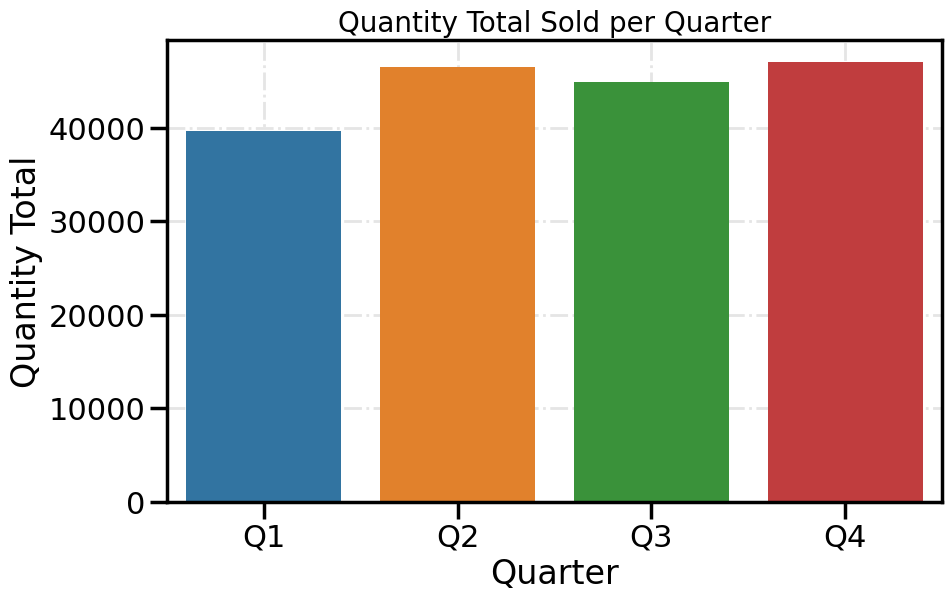

In [157]:
plt.figure(figsize = (10,6))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()
sns.barplot(x = 'Quarter', y = 'Quantity Total', data = melted_sales_data, palette = color, estimator = sum, errorbar = None)
plt.title("Quantity Total Sold per Quarter", fontsize=20)
plt.grid(True, linestyle = '-.', color = '#e5e5e5')
plt.gca().set_axisbelow(True)
plt.show()

#**Quantity Sold per Quarter Bar chart**
- Created a bar plot showing total quantity sold per quarter using Seaborn, grouped by item descriptions.

- Applied custom colors and disabled error bars for a cleaner visual.

- Added a grid and set axis to improve readability of the chart.

In [158]:
Weekly_Low_Volume_Store['Description'].value_counts()

,count
Description,
Beer,85
Vodka / Gin,73
Whiskey,39
Wine,38
Tequila,36
Liqueur,28
Hard Seltzer,20
Rum,18
Brandy / Cognac,15


Checking to see what the count for the top 10 alcohol types is.

In [159]:
melted_sales_data = melted_sales_data.copy()


In [160]:
melted_sales_data.columns

Index(['Item ID', 'Description', 'Bottles Per Case', 'Week', 'Quantity Total',
       'Quarter'],
      dtype='object')

In [161]:
weekly_totals_low = (
    melted_sales_data
    .groupby(['Week', 'Quarter', 'Description'], as_index=False)
    .agg({'Quantity Total': 'mean', 'Bottles Per Case': 'median'})
)

weekly_stats = (
    weekly_totals_low
    .groupby(['Quarter', 'Description'])[['Quantity Total', 'Bottles Per Case']]
    .agg(['mean', 'std'])
    .reset_index()
)



weekly_stats.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0] for col in weekly_stats.columns
]

weekly_stats['Lead Time'] = weekly_stats['Description'].apply(lambda x: 14 if x == 'Beer' else 10)
weekly_stats['Daily Avg Sales'] = weekly_stats['Quantity Total_mean'] / 7
safety_multiplier = 2

weekly_stats['Reorder Point'] = (
    (weekly_stats['Daily Avg Sales'] * weekly_stats['Lead Time']) +
    (safety_multiplier * weekly_stats['Quantity Total_mean'])
)

weekly_stats.rename(columns={
    'Quantity Total_mean': 'Weekly Avg',
    'Quantity Total_std': 'Weekly Std Dev',
    'Bottles Per Case_mean': 'median Bottles/Case',
    'Bottles Per Case_std': 'Std Bottles/Case',
    'Description': 'Alcohol Type',
    'Daily Avg Sales': 'Daily Avg'
}, inplace=True)

buffer_zone = 1.65

lead_time = 10
weekly_stats['Lead Time'] = lead_time

weekly_stats['Reorder Threshold'] = weekly_stats['Alcohol Type'].apply(lambda x: 14 if x == 'Beer' else 10)

weekly_stats['Daily Std Dev'] = weekly_stats['Weekly Std Dev'] / (7 ** 0.5)

weekly_stats['Safety Stock'] = buffer_zone * weekly_stats['Daily Std Dev'] * (weekly_stats['Lead Time'] ** 0.5)

weekly_stats['Reorder Point'] = (
    weekly_stats['Daily Avg'] * weekly_stats['Lead Time']
) + weekly_stats['Safety Stock']
print(weekly_stats)

   Quarter     Alcohol Type  Weekly Avg  Weekly Std Dev  median Bottles/Case  \
0       Q1             Beer    9.902941        2.054061                 24.0   
1       Q1  Brandy / Cognac    5.427778        0.819193                 12.0   
2       Q1     Hard Seltzer    5.800000        2.588085                 24.0   
3       Q1          Liqueur    4.285714        0.933677                120.0   
4       Q1              Rum    8.569444        2.184802                 24.0   
5       Q1   Sparkling Wine    2.316667        1.453418                 12.0   
6       Q1          Tequila    4.997685        1.119379                 12.0   
7       Q1      Vodka / Gin    9.383562        0.899323                 24.0   
8       Q1          Whiskey    9.373932        1.805809                 12.0   
9       Q1             Wine    2.364035        0.821736                 12.0   
10      Q2             Beer   12.514706        2.455503                 24.0   
11      Q2  Brandy / Cognac    7.716667 

# **ABS Algorithim**

1. First grouped sales by Week, Quarter, and Description to get average weekly sales and median bottles per case.

2. Then grouped again by Quarter and Description to calculate mean and standard deviation for both sales and bottles per case.

3. Cleaned up column names to make them easier to read, and added lead times14 days for beer, 10 for everything else.

4. Calculated daily averages and daily standard deviations, then used a buffer zone of 1.65 to compute safety stock.

5. Finally, updated the Reorder Point formula to include safety stock for a more accurate threshold based on demand variability and lead time.

This allows for visualizations to more easily be done by utilizing several variables like quarter, alcohol type, safety stock and reorder point.

In [162]:
weekly_stats['Reorder Point ABS'] = weekly_stats['Daily Avg'] * weekly_stats['Lead Time'] / 2.6


ABS calculates their reorder point using daily average sales multiplied by lead time. Since my current calculations are based on a quarterly (13-week) basis and ABS uses a 5-week timeframe, I divided the result by 2.6 (13 ÷ 5) to align my formula with ABS’s 5-week reorder point approach.

In [163]:
weekly_stats.columns

Index(['Quarter', 'Alcohol Type', 'Weekly Avg', 'Weekly Std Dev',
       'median Bottles/Case', 'Std Bottles/Case', 'Lead Time', 'Daily Avg',
       'Reorder Point', 'Reorder Threshold', 'Daily Std Dev', 'Safety Stock',
       'Reorder Point ABS'],
      dtype='object')

updated version with the new column added of 'Reorder Point ABS'

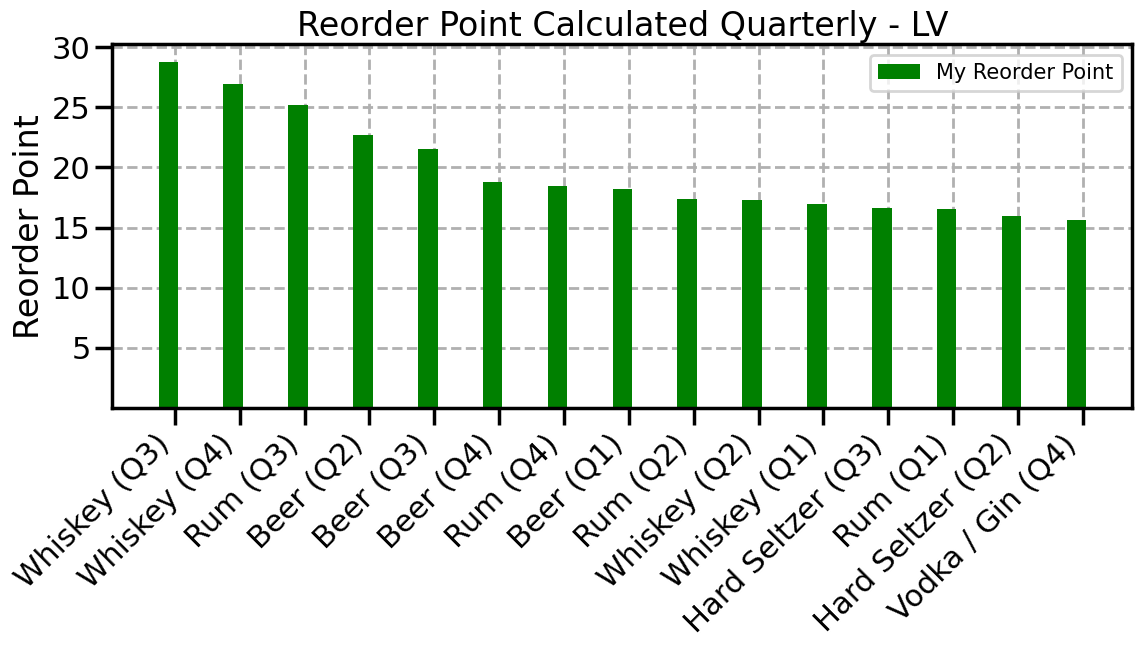

In [164]:
subset = weekly_stats[['Alcohol Type', 'Reorder Point', 'Reorder Point ABS', 'Quarter']].copy()
subset = subset.sort_values('Reorder Point', ascending=False).head(15)

x = range(len(subset))

xtick_labels = [f"{row['Alcohol Type']} ({row['Quarter']})" for _, row in subset.iterrows()]

plt.figure(figsize=(12, 7))
plt.bar(x, subset['Reorder Point'], width=0.3, label='My Reorder Point', align='center', color = 'green')


plt.xticks([i + 0.1 for i in x], xtick_labels, rotation=45, ha='right')
plt.yticks(range(5,31,5))
plt.ylabel('Reorder Point')
plt.title('Reorder Point Calculated Quarterly - LV')
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid(linestyle = "--")
plt.gca().set_axisbelow(True)
plt.show()


#**My Reorder Point Formula bar chart**
This bar chart showcases the top 15 reorder point values based on quarter and alcohol type, calculated using my custom reorder point formula. The x-axis labels have been formatted with help from ChatGPT to include the quarter in parentheses next to each alcohol type for better readability.

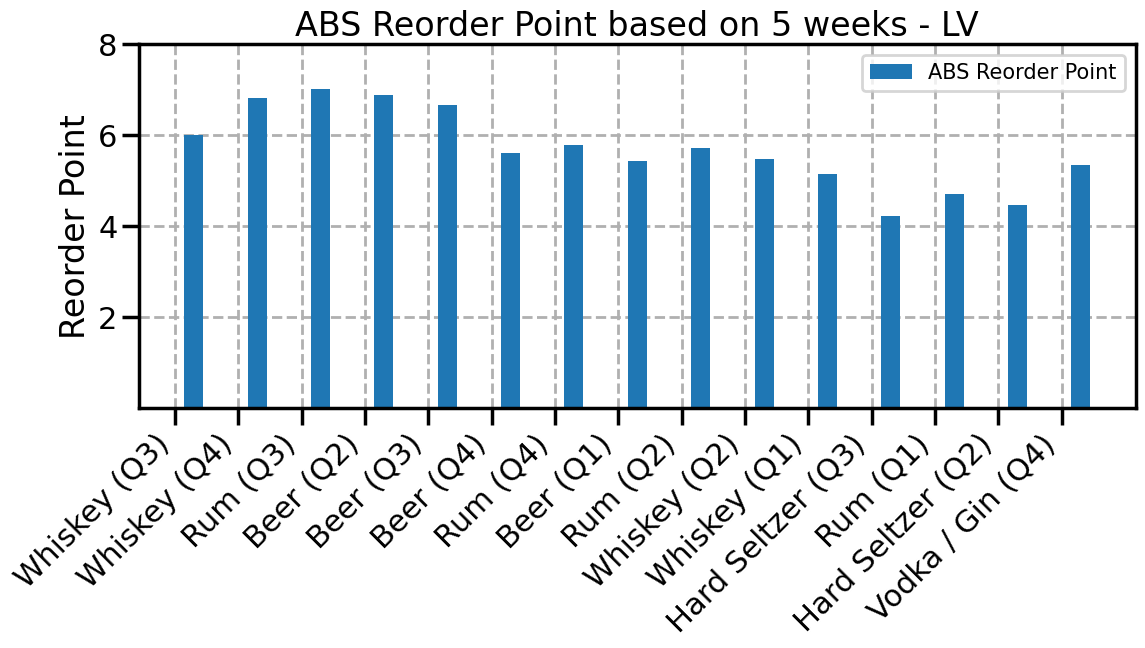

In [165]:
subset = weekly_stats[['Alcohol Type', 'Reorder Point', 'Reorder Point ABS', 'Quarter']].copy()
subset = subset.sort_values('Reorder Point', ascending=False).head(15)

x = range(len(subset))

xtick_labels = [f"{row['Alcohol Type']} ({row['Quarter']})" for _, row in subset.iterrows()]

plt.figure(figsize=(12, 7))
plt.bar([i + 0.4 for i in x], subset['Reorder Point ABS'], width=0.3, label='ABS Reorder Point', align='center')


plt.xticks([i + 0.1 for i in x], xtick_labels, rotation=45, ha='right')
plt.yticks(range(2,10,2))
plt.ylabel('Reorder Point')
plt.title('ABS Reorder Point based on 5 weeks - LV')
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid(linestyle = "--")
plt.gca().set_axisbelow(True)

plt.show()

#**ABS Reorder Point Formula bar chart**
I used ChatGPT to help format the x-axis labels by adding the quarter in parentheses next to each alcohol type. This bar chart displays the top 15 reorder point values calculated using ABS’s formula, based on a 5-week demand period. The x-axis labels include both the alcohol type and its corresponding quarter (in parentheses) for clarity.

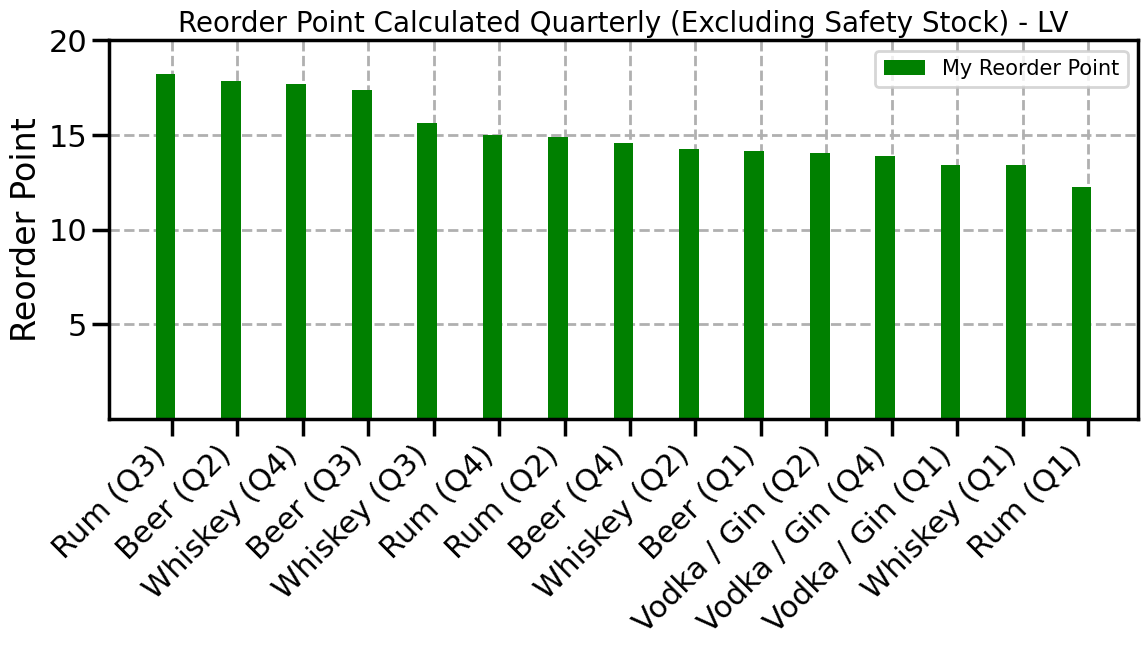

In [166]:
weekly_stats['Reorder Point'] = (
    weekly_stats['Daily Avg'] * weekly_stats['Lead Time'])

subset = weekly_stats[['Alcohol Type', 'Reorder Point', 'Reorder Point ABS', 'Quarter']].copy()
subset = subset.sort_values('Reorder Point', ascending=False).head(15)

x = range(len(subset))

xtick_labels = [f"{row['Alcohol Type']} ({row['Quarter']})" for _, row in subset.iterrows()]

plt.figure(figsize=(12, 7))
plt.bar(x, subset['Reorder Point'], width=0.3, label='My Reorder Point', align='center', color = 'green')


plt.xticks([i + 0.1 for i in x], xtick_labels, rotation=45, ha='right')
plt.yticks(range(5,21,5))
plt.ylabel('Reorder Point')
plt.title('Reorder Point Calculated Quarterly (Excluding Safety Stock) - LV', fontsize = 20)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid(linestyle = "--")
plt.gca().set_axisbelow(True)
plt.show()

#**My Reorder Point Formula Without Safety Stock bar chart**
This bar chart displays the top 15 reorder point values, grouped by quarter and alcohol type, calculated using the formula: daily average sales multiplied by lead time, without factoring in safety stock. The x-axis labels have been formatted with assistance from ChatGPT to include the quarter in parentheses alongside each alcohol type for enhanced readability.

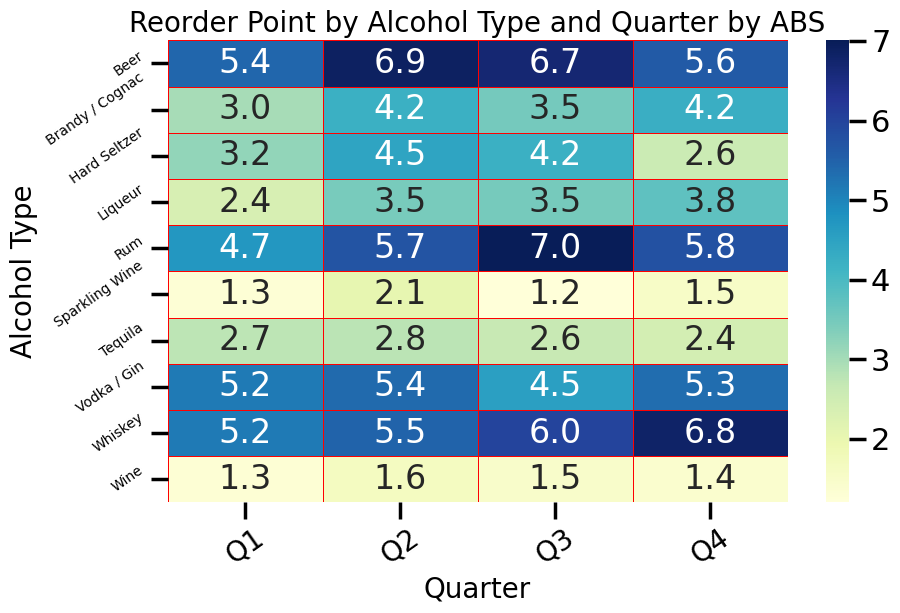

In [167]:
plt.figure(figsize = (10,6))
heatmap_data = weekly_stats.pivot_table(
    index = 'Alcohol Type',
    columns = 'Quarter',
    values = 'Reorder Point ABS'
)

sns.heatmap(heatmap_data, annot = True, cmap = 'YlGnBu', fmt = ".1f", linewidths=.5, linecolor = 'red')

plt.title("Reorder Point by Alcohol Type and Quarter by ABS", fontsize=20)
plt.xlabel("Quarter", fontsize=20)
plt.ylabel("Alcohol Type", fontsize=20)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(rotation=35, fontsize=10)
plt.show()

#**Reorder Point Heatmap ABS**

ABS's quarterly calculations for the top 10 alcohol categories result in significantly lower values compared to my analysis, implying less conservative values for reorder point

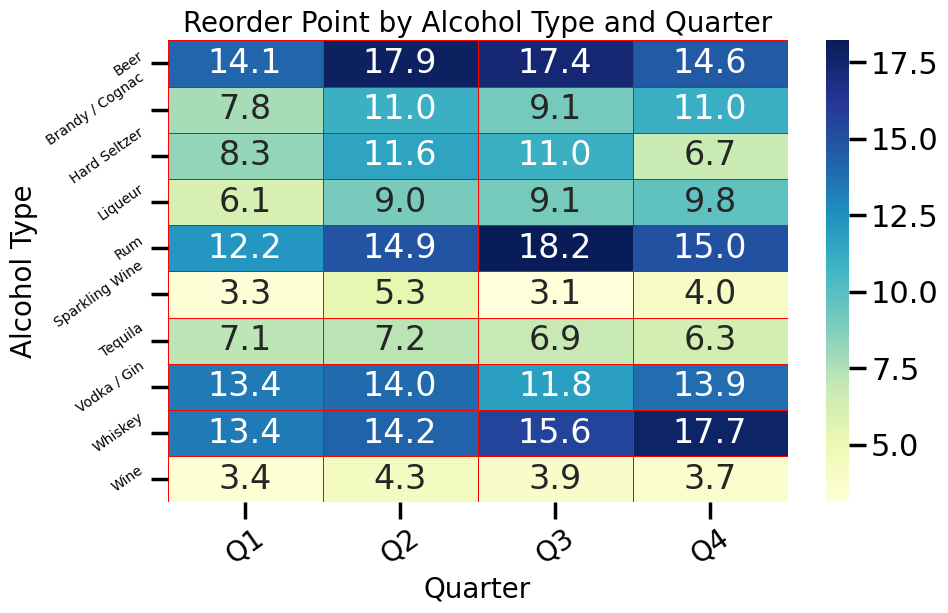

In [168]:
plt.figure(figsize = (10,6))
heatmap_data = weekly_stats.pivot_table(
    index = 'Alcohol Type',
    columns = 'Quarter',
    values = 'Reorder Point'
)

sns.heatmap(heatmap_data, annot = True, cmap = 'YlGnBu', fmt = ".1f", linewidths=.5, linecolor = 'red')

plt.title("Reorder Point by Alcohol Type and Quarter", fontsize=20)
plt.xlabel("Quarter", fontsize=20)
plt.ylabel("Alcohol Type", fontsize=20)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(rotation=35, fontsize=10)
plt.show()

#**Reorder Point Heatmap my Analysis**
Utilized a heatmap to calculate the Reorder Point for each alcohol type by quarter to identify top-selling items and spot major seasonal demand shifts.

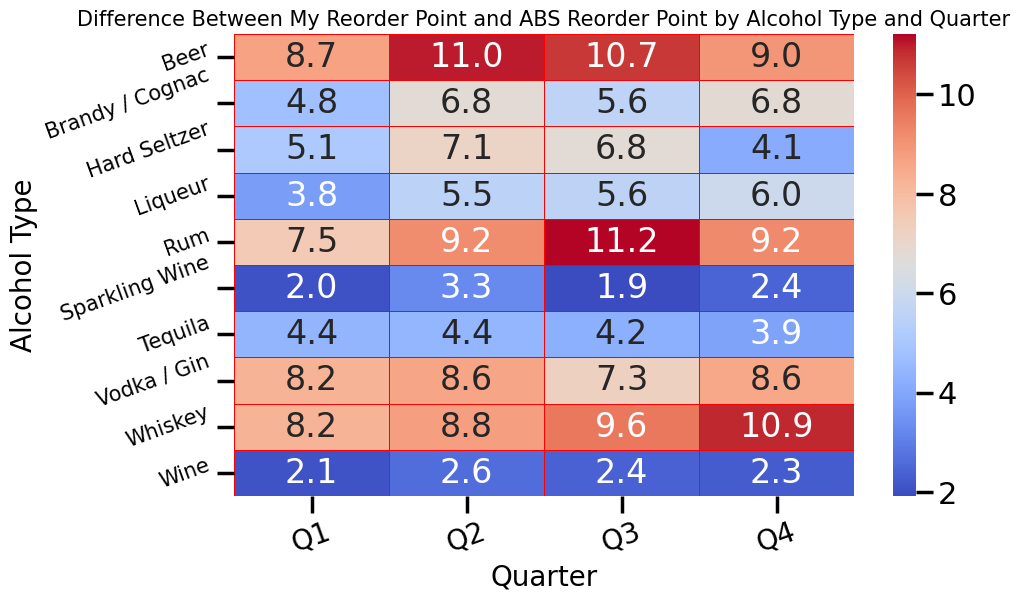

In [169]:
weekly_stats['Reorder Point Difference'] = weekly_stats['Reorder Point'] - weekly_stats['Reorder Point ABS']

heatmap_data_diff = weekly_stats.pivot_table(
    index='Alcohol Type',
    columns='Quarter',
    values='Reorder Point Difference'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_diff, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, linecolor='red')

plt.title("Difference Between My Reorder Point and ABS Reorder Point by Alcohol Type and Quarter", fontsize=15)
plt.xlabel("Quarter", fontsize=20)
plt.ylabel("Alcohol Type", fontsize=20)
plt.xticks(rotation=20, fontsize=20)
plt.yticks(rotation=20, fontsize=15)
plt.show()

#**Difference in units between my analysis and ABS's Heatmap**

This heatmap illustrates the difference between my calculated reorder points and those used by ABS, broken down by alcohol type and quarter. Positive values (shown in warmer tones) indicate where my model recommends higher reorder points, while cooler tones represent instances where ABS's values are higher.

As seen across most categories, my reorder points tend to be consistently greater than those set by ABS. This suggests that my model is more conservative, aiming to maintain higher inventory levels, as a buffer against variability in demand or potential delays in lead time.

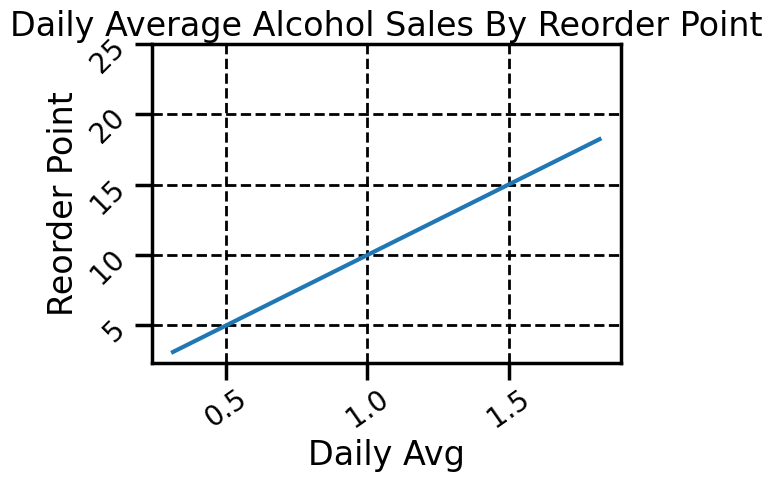

In [170]:
sns.lineplot(x = 'Daily Avg', y = 'Reorder Point', data = weekly_stats)

sns.set_context("poster")
plt.tight_layout()
plt.title("Daily Average Alcohol Sales By Reorder Point")
plt.grid(linestyle = "--", color = "black")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(5,30,5),rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

#**Daily Average alcohol sales by Reorder Point lineplot**

The line plot above illustrates that as the daily average alcohol sales increase, the corresponding reorder point also rises; which is logical, since higher sales volumes demand more frequent restocking.



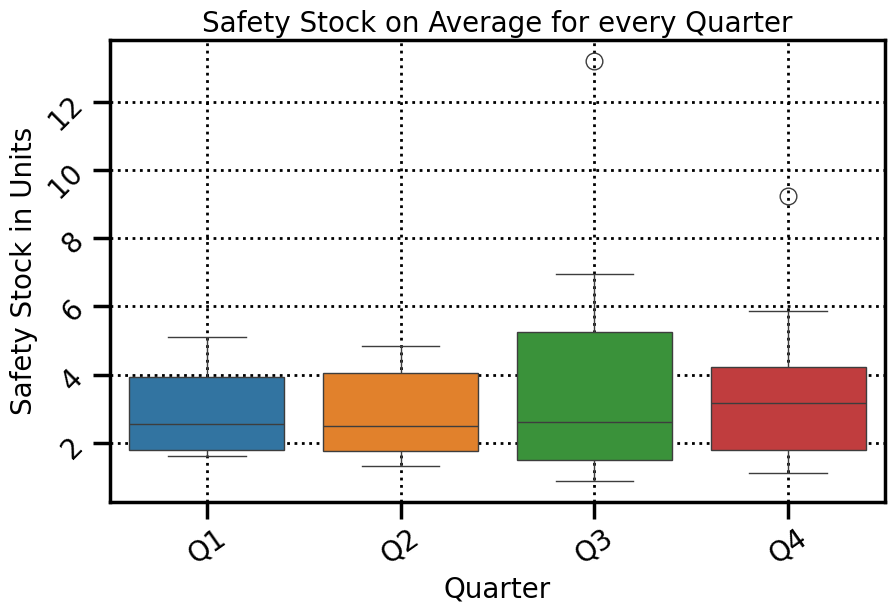

In [171]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "Quarter", y = "Safety Stock", data = weekly_stats, hue = "Quarter")
sns.set_context("poster")
plt.title("Safety Stock on Average for every Quarter", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Safety Stock in Units", fontsize = 20)
plt.grid(linestyle = ":", color = "black")
plt.show()

#**Safety Stock by quarter Boxplot**
Created a boxplot displaying safety stock by quarter. For example, in Q3, there's more variation in the amount of alcohol needed, indicating greater week-to-week sales fluctuations during this period.

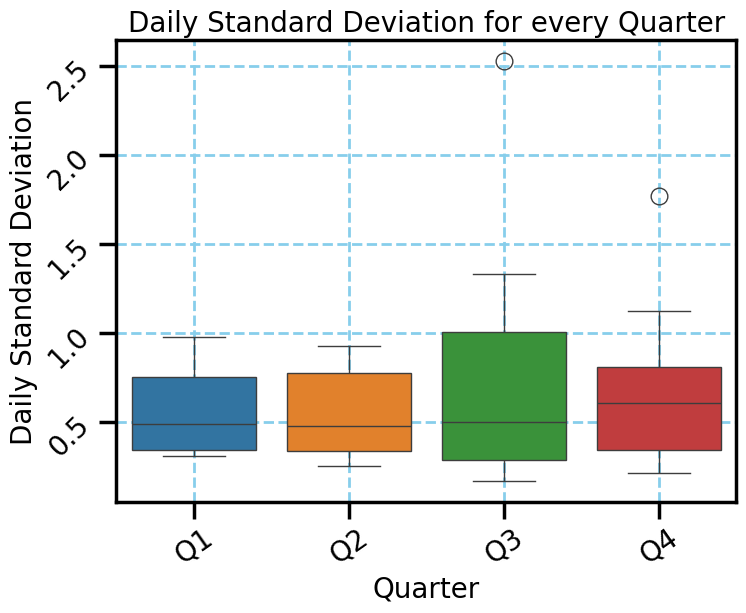

In [172]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Quarter", y = "Daily Std Dev", hue = "Quarter", data = weekly_stats)
plt.title("Daily Standard Deviation for every Quarter", fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Daily Standard Deviation", fontsize = 20)
plt.grid(linestyle = "dashed", color = "skyblue")
plt.show()

# **Daily Standard Deviation by Quarter boxplot**
Created a boxplot illustrating the daily standard deviation by quarter. Similar to the previous chart, Q3 shows higher variation in daily standard deviation, indicating a greater influx of seasonal fluctuations during this period.

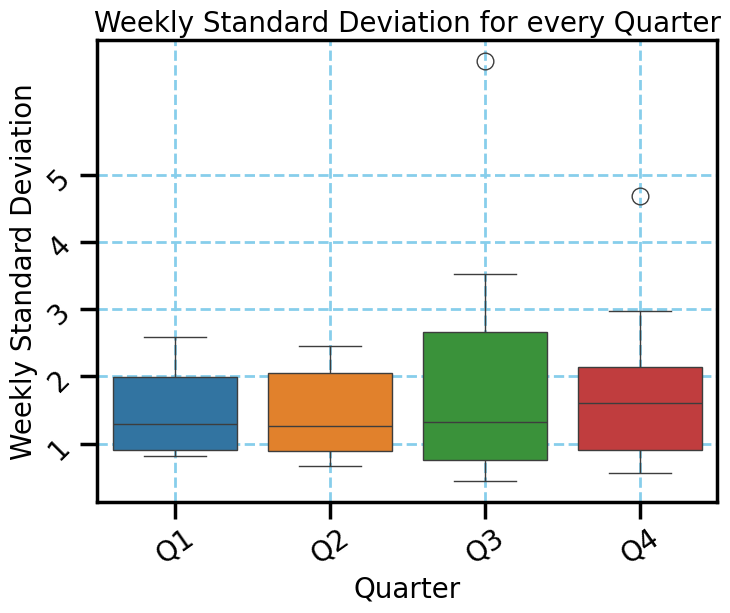

In [173]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Quarter", y = "Weekly Std Dev", hue = "Quarter", data = weekly_stats)
plt.title("Weekly Standard Deviation for every Quarter", fontsize = 20)
plt.yticks(range(1,6,1),rotation = 45, fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Weekly Standard Deviation", fontsize = 20)
plt.grid(linestyle = "dashed", color = "skyblue")
plt.show()

# **Weekly Standard Deviation by Quarter boxplot**

Created a boxplot illustrating the weekly standard deviation by quarter. Similar to the previous chart, Q3 shows higher variation in daily standard deviation, indicating a greater influx of seasonal fluctuations during this period.

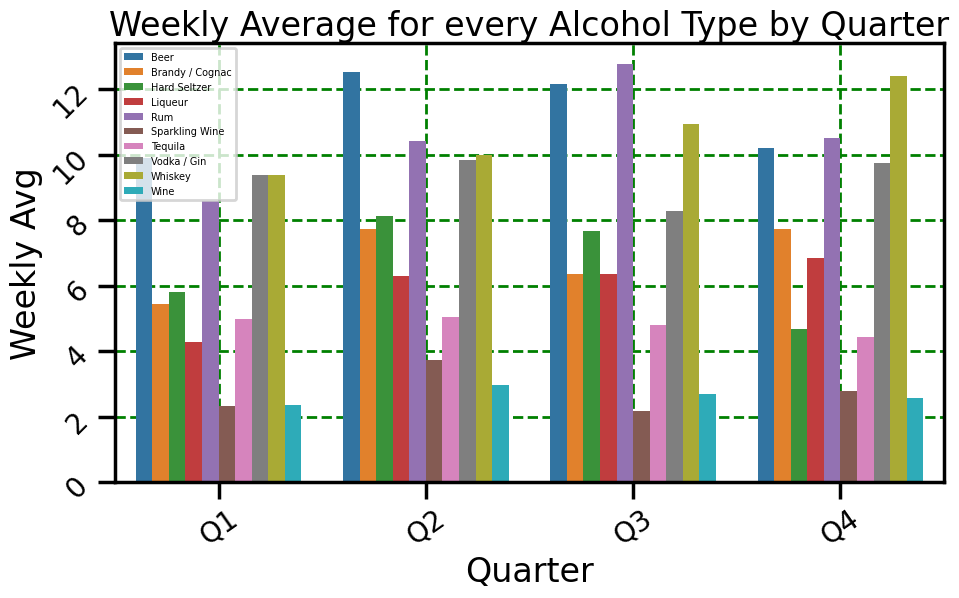

In [174]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Weekly Avg', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 7)
plt.title("Weekly Average for every Alcohol Type by Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks( rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

#**Weekly Average Alcohol Sales by Quarter Bar Chart**

Weekly Average alcohol sales for top 10 alcohol types and by quarter. This gives information on the most popular alcohol types by quarter and which may need to be ordered more of at certain types of the year

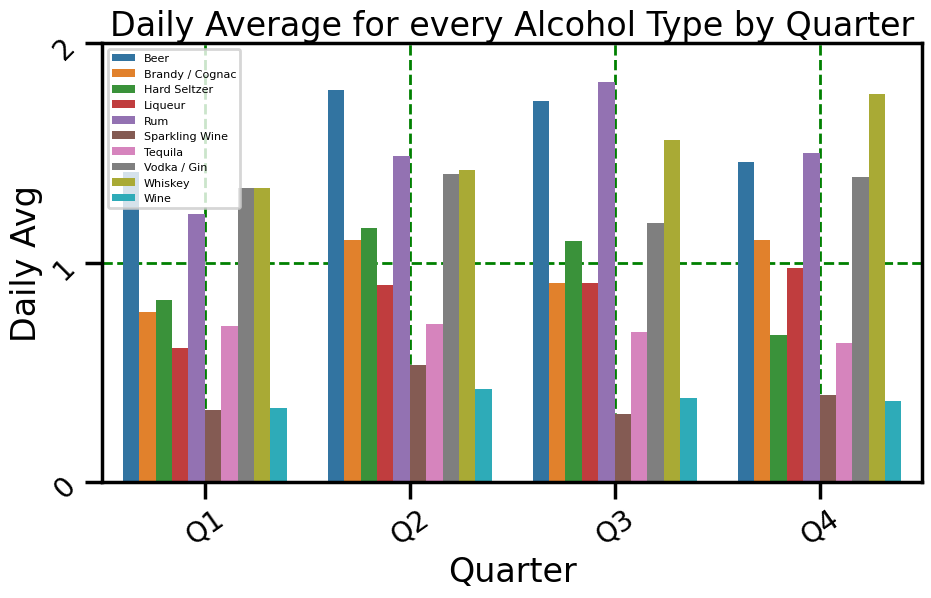

In [175]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Daily Avg', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 8)
plt.title("Daily Average for every Alcohol Type by Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(0,3,1), rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

#**Daily Average Alcohol Sales by Quarter Bar Chart**

Daily Average alcohol sales for top 10 alcohol types and by quarter. This gives information on the most sold alcohol types every day and which may need to have a higher safety stock depending on the quarter.

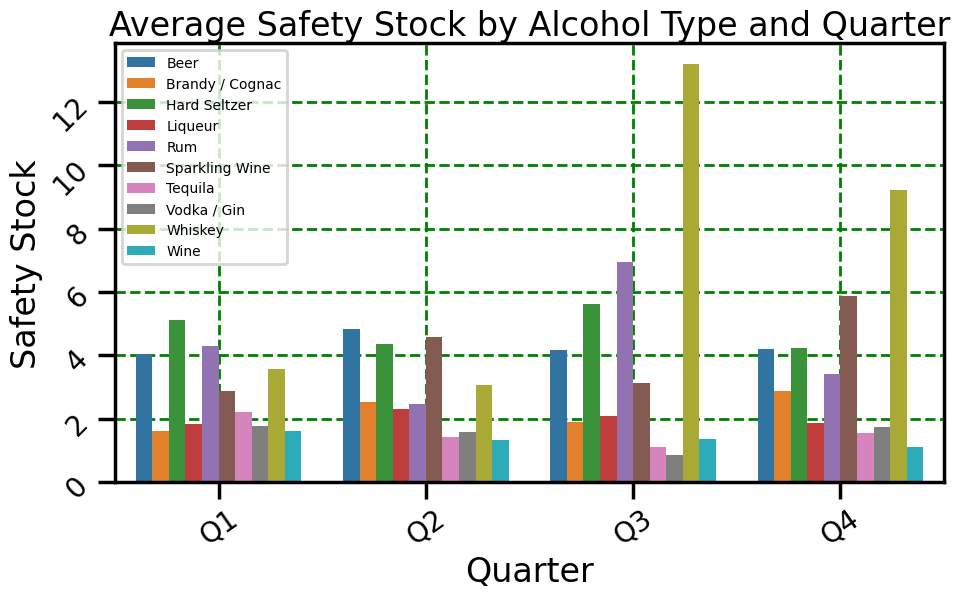

In [176]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Safety Stock', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Average Safety Stock by Alcohol Type and Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

# **Average Safety Stock by Alcohol Type and Quarter Bar Chart**

This chart displays the average safety stock required for each alcohol type across different quarters. It helps identify which alcohol types may need higher inventory levels during specific quarters based on their seasonal demand patterns, with variations clearly highlighted by the seasonal shifts

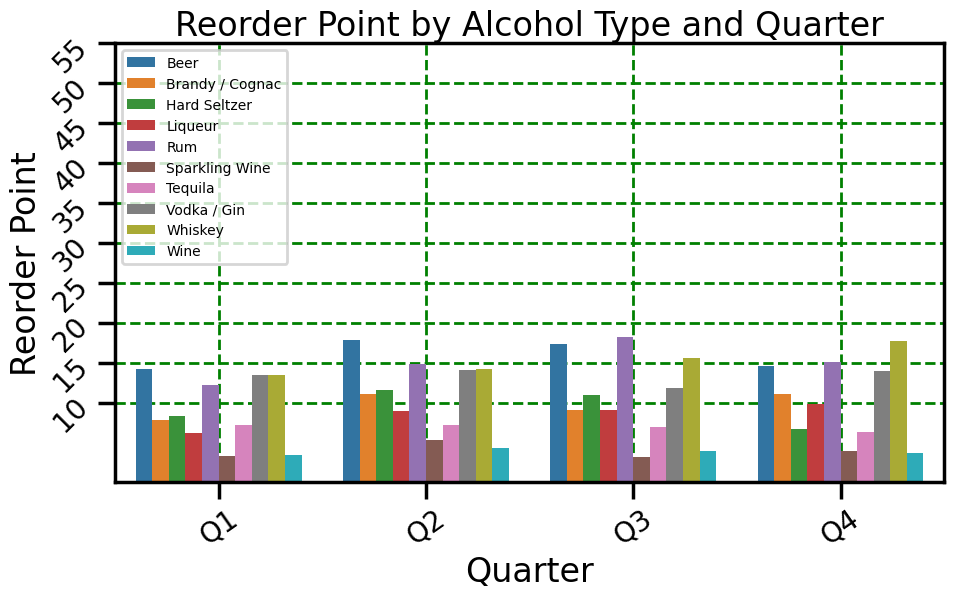

In [177]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Reorder Point', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Reorder Point by Alcohol Type and Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(10,60,5), rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

# **Reorder Point by Alcohol Type and Quarter Bar Chart**

This chart visualizes the reorder point for each alcohol type across different quarters. It shows the point at which inventory levels should trigger a restock, helping to determine the ideal order quantities for each alcohol type based on quarterly demand fluctuations.